### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [517]:
data = pd.read_csv('data/coupons.csv')

In [518]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [519]:
data.isnull().sum()
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])

desc = pd.DataFrame(index = list(data))
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['%unique'] = desc['nunique'] / len(data) * 100
desc['null'] = data.isnull().sum()
desc['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
desc['type'] = data.dtypes
desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
desc


,count,nunique,%unique,null,Percentage_missing,type,mean,std,min,25%,50%,75%,max
destination,12684,3,0.023652,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,12684,4,0.031536,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,12684,3,0.023652,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,12684,3,0.023652,0,NaN,int64,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
time,12684,5,0.039420,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,12684,5,0.039420,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,12684,2,0.015768,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,12684,2,0.015768,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12684,8,0.063072,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maritalStatus,12684,5,0.039420,0,NaN,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Decide what to do about your missing data -- drop, replace, other...

In [520]:
#drop car as 98% value is missing and  toCoupon_GEQ5min as it has only one value 
for col in ['car','toCoupon_GEQ5min']:
    if( col in data.columns.values):
        data.drop(['car','toCoupon_GEQ5min'],axis = 1, inplace=True)


In [522]:
#below function will impute null values with mean value in that column
def impute(x):
    data[x].fillna(data[x].value_counts().index[0],inplace=True)
for x in desc.query('null > 0').index:
    if(x not in ['car','toCoupon_GEQ5min']):
        impute(x)


In [524]:
# convert age column to numeric by substituting 50plus to 51 and below 21 to 20 and less1 which is 0 in 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'
def less1isnever(x):
    data[x] = data.Bar.replace('less1','never')
data['age'] = pd.to_numeric(data.age.replace('50plus','51').replace('below21','20'))
data.age.value_counts()
for x in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    less1isnever(x)


4. What proportion of the total observations chose to accept the coupon? 



<Axes: title={'center': 'Acceptance %'}, ylabel='count'>

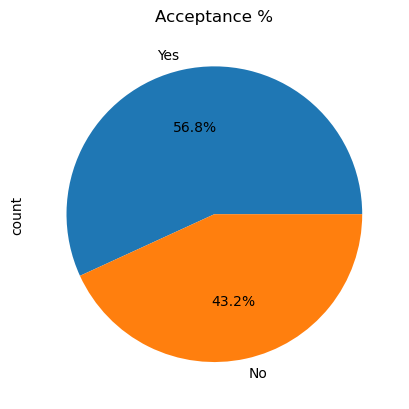

In [526]:
#data.query('Y == 1').shape[0]/data.shape[0]*100
data.Y.value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Yes','No'],title='Acceptance %')

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Coupon  Count')

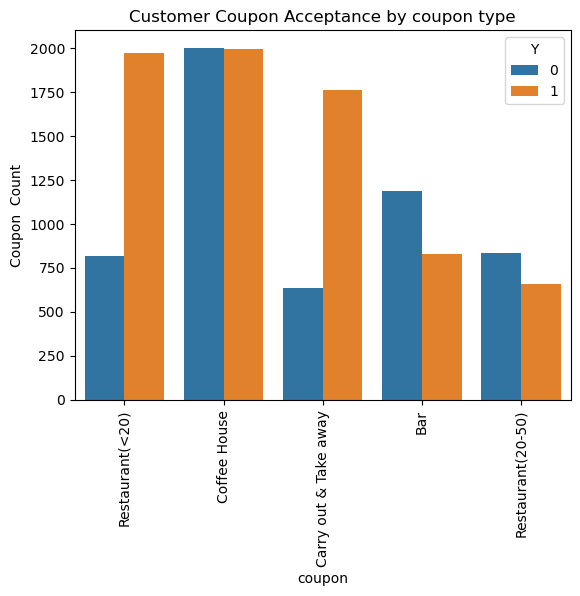

In [536]:
sns.countplot(data,x='coupon',hue='Y')
plt.xticks(rotation=90)
plt.title('Customer Coupon Acceptance by coupon type')
plt.ylabel('Coupon  Count')


6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Coupon Acceptance Count')

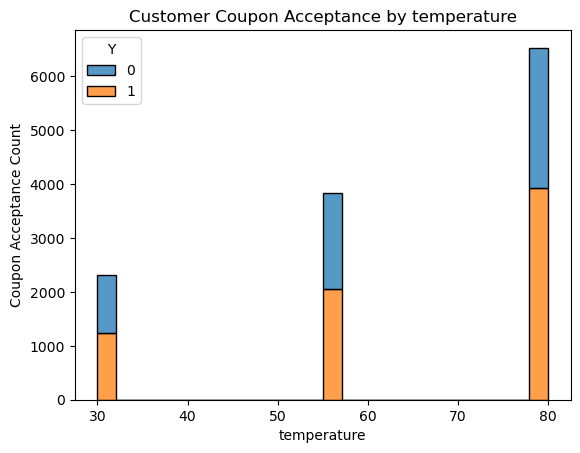

In [533]:
sns.histplot(data,x='temperature',hue='Y',multiple="stack")
plt.title('Customer Coupon Acceptance by temperature')
plt.xlabel('temperature')
plt.ylabel('Coupon Acceptance Count')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [537]:
data['accepted'] = data.Y.apply(lambda x : "Yes" if x ==1 else "No")
bardf =  data.query('coupon == "Bar"')
bardf.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,never,never,1,0,0,1,0,No
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,never,never,0,0,1,0,1,Yes
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,never,never,1,1,0,1,0,No
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,never,never,never,0,0,0,1,1,Yes
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,never,never,never,0,0,1,0,1,Yes


2. What proportion of bar coupons were accepted?


<Axes: ylabel='count'>

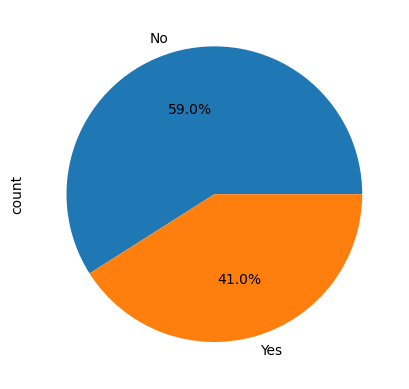

In [419]:
bardf.accepted.value_counts().plot(kind='pie',autopct='%1.1f%%')
# 41 % acceptance rate on bar coupon 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0.5, 1.0, 'Acceptance Rate Bar more than 3')

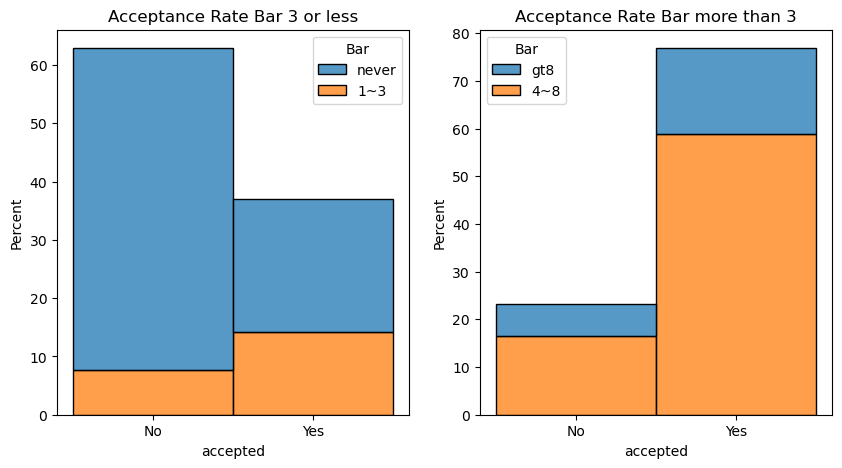

In [546]:
bar_3_less = ['never', 'less1', '1~3']
bar_3_more = ['4~8', 'gt8']
fig,axs = plt.subplots(1,2,sharey=False,figsize=(10,5),sharex=True)
p1=sns.histplot(bardf.query('Bar in @bar_3_less'),x='accepted',hue='Bar',stat="percent",multiple="stack",ax=axs[0])
p2=sns.histplot(bardf.query('Bar in @bar_3_more'),x='accepted',hue='Bar',stat="percent",multiple="stack")
p1.set_title('Acceptance Rate Bar 3 or less')
p2.set_title('Acceptance Rate Bar more than 3')
#37% of those who visited bars 3 times or less and accepted the bar coupon
#76% of those who visited bars 3 times or more and accepted the bar coupon


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: xlabel='accepted', ylabel='age'>

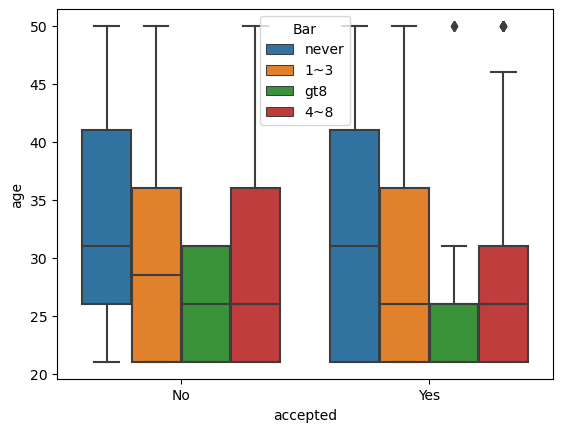

In [494]:
sns.boxplot(bardf,x='accepted',y='age',hue='Bar')

(1421, 25)

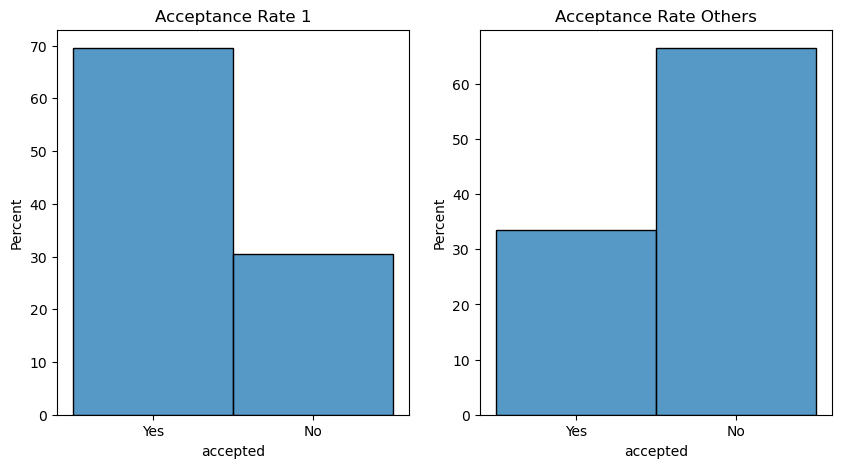

In [555]:

fig,axs = plt.subplots(1,2,sharey=False,figsize=(10,5),sharex=True)
p1=sns.histplot(bardf.query('Bar != "never" and age > 25'),x='accepted',stat="percent",multiple="stack",ax=axs[0])
p2=sns.histplot(bardf.query('not(Bar != "never" and age > 25)'),x='accepted',stat="percent",multiple="stack",ax=axs[1])
p1.set_title('Acceptance Rate 1')
p2.set_title('Acceptance Rate Others')
#68% of customers who visit the bar more than once a month and are over the age of 25 accept the bar coupon 
#32% of customers who visit the bar less than once a month accept the bar coupon


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Text(0.5, 1.0, 'Acceptance Rate Others')

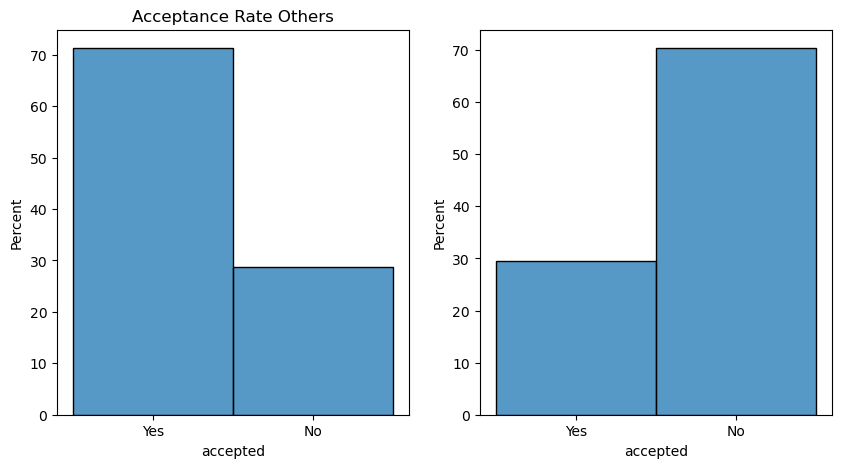

In [557]:

fig,axs = plt.subplots(1,2,sharey=False,figsize=(10,5),sharex=True)
p1=sns.histplot(bardf.query('Bar != "never" and passanger != "Kid(s)" and occupation  not in @acc'),x='accepted',stat="percent",multiple="stack",ax=axs[0])
p2=sns.histplot(bardf.query('not(Bar != "never" and passanger != "Kid(s)" and occupation   not in @acc)'),x='accepted',stat="percent",multiple="stack",ax=axs[1])
p1.set_title('Acceptance Rate ')
p1.set_title('Acceptance Rate Others')
# 72% of customers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry accepted bar coupon
# 29% of acceptance in the others category


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Text(0.5, 1.0, 'Acceptance Rate 3')

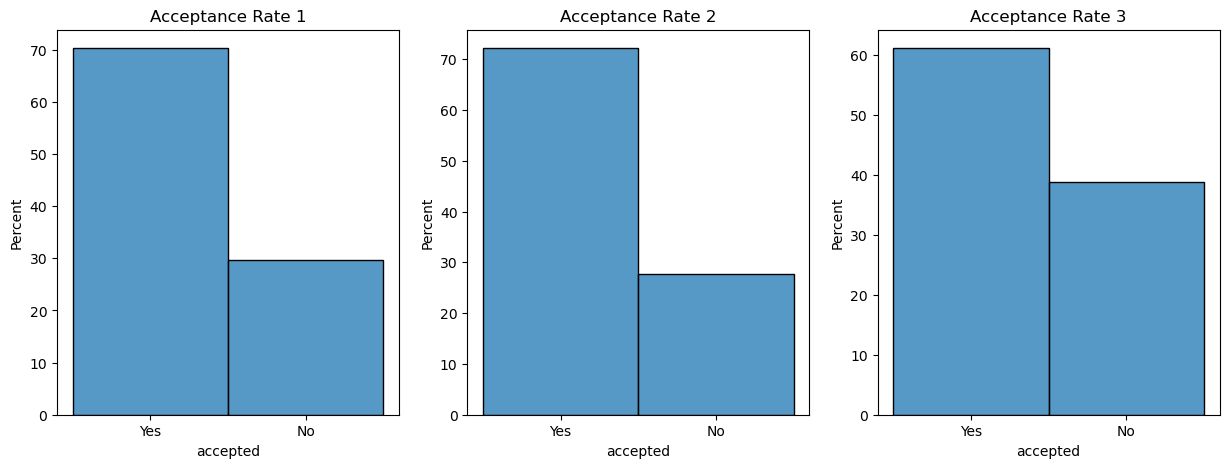

In [445]:
fig,axs = plt.subplots(1,3,sharey=False,figsize=(15,5),sharex=True)
RLessThan20 = ['4~8','gt8']
incless50k=['$25000 - $37499','$12500 - $24999','$37500 - $49999']
p1=sns.histplot(bardf.query('Bar != "never" and passanger != "Kid(s)" and maritalStatus !="Widowed"'),x='accepted',stat="percent",multiple="stack",ax=axs[0])
p2=sns.histplot(bardf.query('Bar != "never" and age <30'),x='accepted',stat="percent",multiple="stack",ax=axs[1])
p3=sns.histplot(data.query('RestaurantLessThan20 in @RLessThan20 and income in @incless50k'),x='accepted',stat="percent",multiple="stack",ax=axs[2])
p1.set_title('Acceptance Rate 1')
p2.set_title('Acceptance Rate 2')
p3.set_title('Acceptance Rate 3')
#70% of bar visiting, non-kid passenger, non-widow customers accepted the bar coupon

#72% of bar visting, under 30 year olds accepted the bar coupon

#61% of those making $50k or less who frequented cheap restaurants accepted the bar coupon


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Acceptacne Rate is High around 70% in the cohert of customers who goes to bar more than once a month with no children in the passenger and customer age > 25.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the RestaurantLessThan20 coupons.

In [433]:
R20 =  data.query('coupon == "Restaurant(<20)"')


2. Acceptance rate of RestaurantLessThan20

<Axes: ylabel='count'>

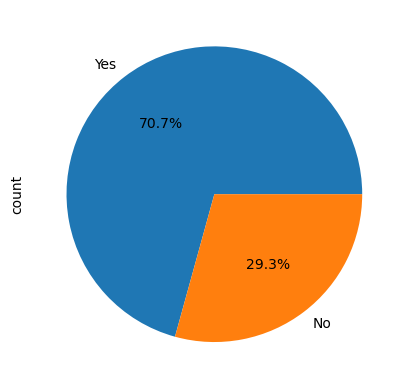

In [435]:

R20.accepted.value_counts().plot(kind='pie',autopct='%1.1f%%')
#excellent acceptance rate of this coupon lets find the customer characteristics to maximize camapaign return

Text(0.5, 1.0, 'Acceptance by passanger')

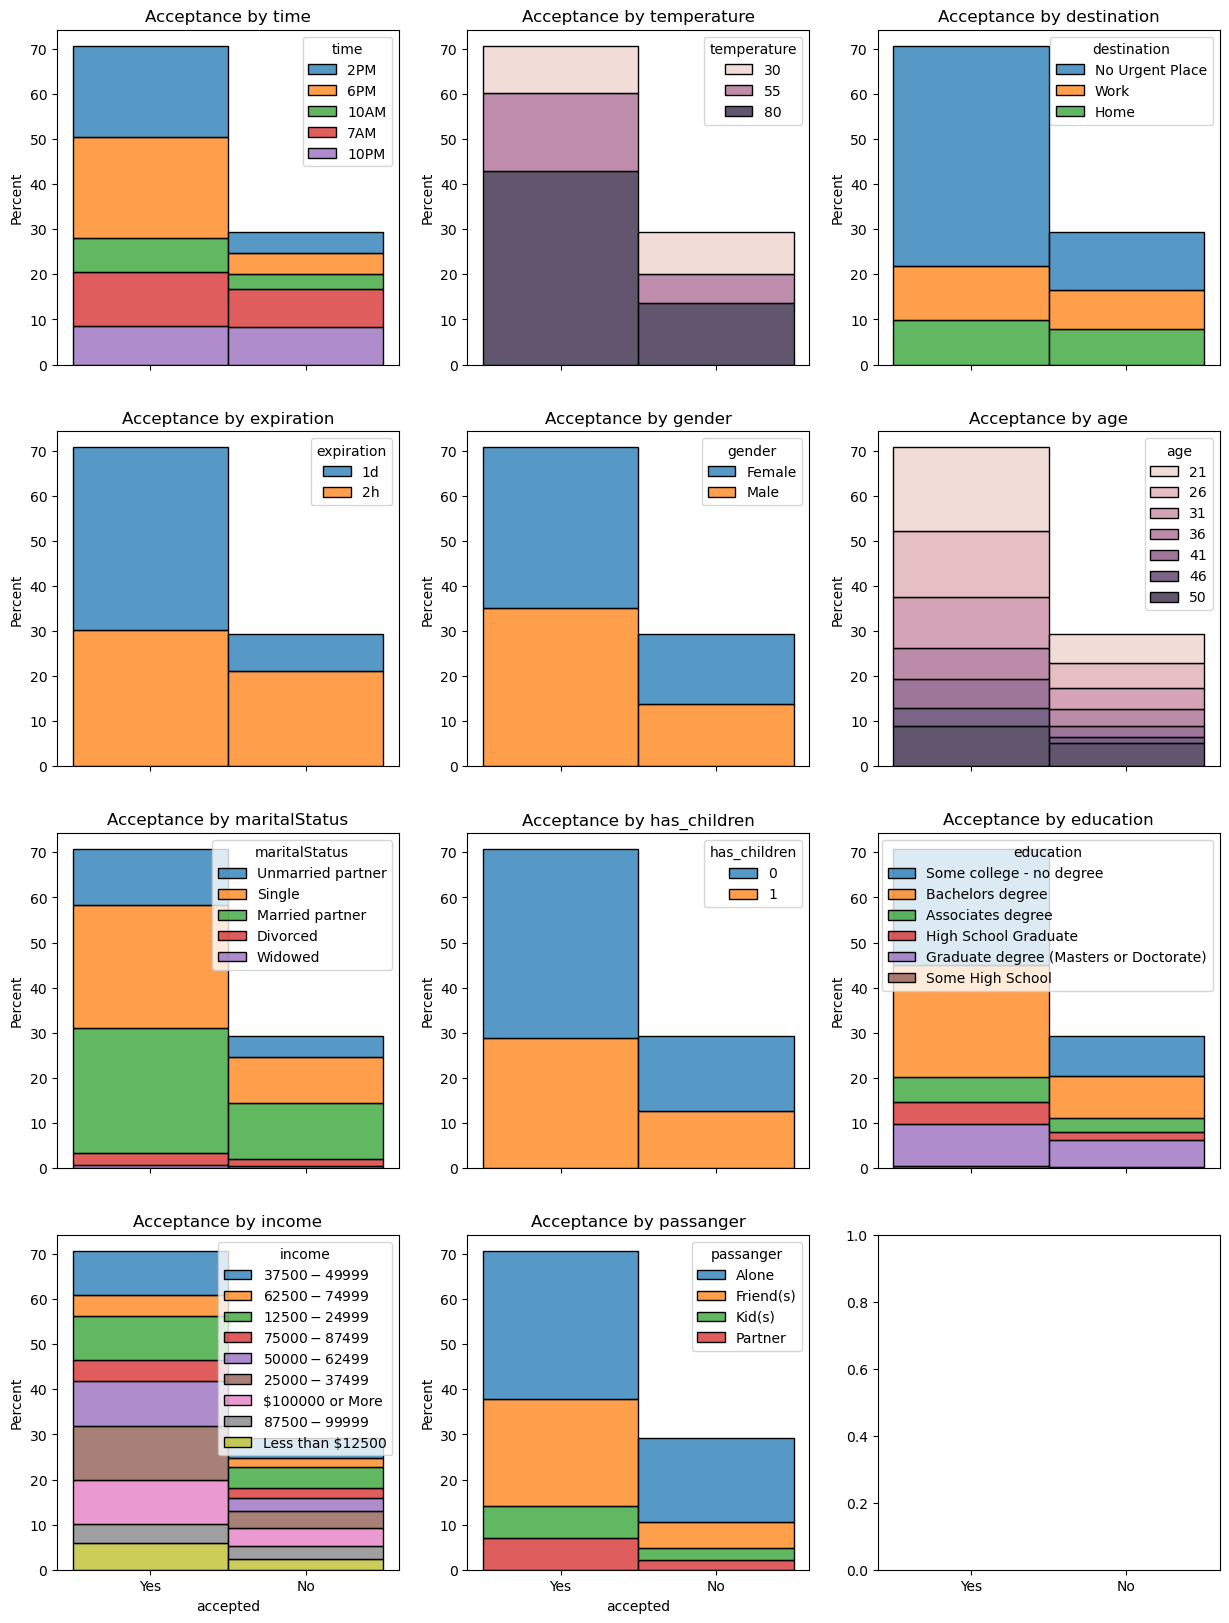

In [473]:
#use histogram to compare which feature impact acceptance rate of Restaurant(<20)
fig,axs = plt.subplots(4,3,sharey=False,figsize=(15,20),sharex=True)
p1 = sns.histplot(R20,x='accepted',hue='time',multiple="stack",ax=axs[0,0],stat="percent")
p1.set_title('Acceptance by time')
p2 = sns.histplot(R20,x='accepted',hue='temperature',multiple="stack",ax=axs[0,1],stat="percent")
p2.set_title('Acceptance by temperature')
p3 = sns.histplot(R20,x='accepted',hue='destination',multiple="stack",ax=axs[0,2],stat="percent")
p3.set_title('Acceptance by destination')
p11 = sns.histplot(R20,x='accepted',hue='expiration',multiple="stack",ax=axs[1,0],stat="percent")
p11.set_title('Acceptance by expiration')
p12 = sns.histplot(R20,x='accepted',hue='gender',multiple="stack",ax=axs[1,1],stat="percent")
p12.set_title('Acceptance by gender')
p13 = sns.histplot(R20,x='accepted',hue='age',multiple="stack",ax=axs[1,2],stat="percent")
p13.set_title('Acceptance by age')
p21 = sns.histplot(R20,x='accepted',hue='maritalStatus',multiple="stack",ax=axs[2,0],stat="percent")
p21.set_title('Acceptance by maritalStatus')
p22 = sns.histplot(R20,x='accepted',hue='has_children',multiple="stack",ax=axs[2,1],stat="percent")
p22.set_title('Acceptance by has_children')
p23 = sns.histplot(R20,x='accepted',hue='education',multiple="stack",ax=axs[2,2],stat="percent")
p23.set_title('Acceptance by education')
p32 = sns.histplot(R20,x='accepted',hue='income',multiple="stack",ax=axs[3,0],stat="percent")
p32.set_title('Acceptance by income')
p33 = sns.histplot(R20,x='accepted',hue='passanger',multiple="stack",ax=axs[3,1],stat="percent")
p33.set_title('Acceptance by passanger')
# Based on below charts Time, Temperature , destination seems to correlate well with acceptance of this coupon

Text(0.5, 1.0, 'Acceptance by occupation')

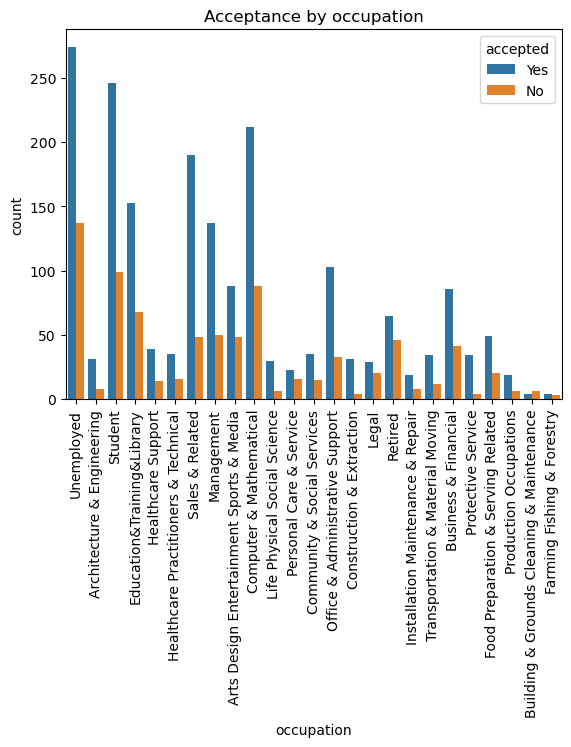

In [561]:
# draw countplot on occupation to identify which occupation has highest acceptanc rate 

p1=sns.countplot(R20,x='occupation',hue='accepted')
plt.xticks(rotation=90)
p1.set_title('Acceptance by occupation')
# unemployed, student are the customer occupation who utilize the coupon most

Text(0.5, 1.0, 'Acceptance by income >50k')

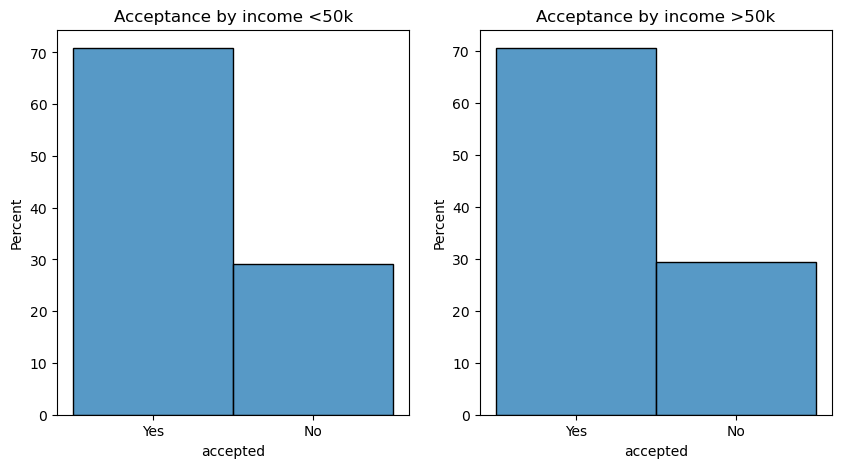

In [563]:
#Bucket income <50K and >50k to compare acceptance
fig,axs = plt.subplots(1,2,sharey=False,figsize=(10,5),sharex=True)
p1 = sns.histplot(R20.query('income in @incless50k'),x='accepted',multiple="stack",ax=axs[0],stat="percent")
p1.set_title('Acceptance by income <50k')
p2 = sns.histplot(R20.query('income not in @incless50k'),x='accepted',multiple="stack",ax=axs[1],stat="percent")
p2.set_title('Acceptance by income >50k')
#Customer Income does not seem to impact the acceptance rate of this coupon

Text(0.5, 1.0, 'Acceptance Rate2')

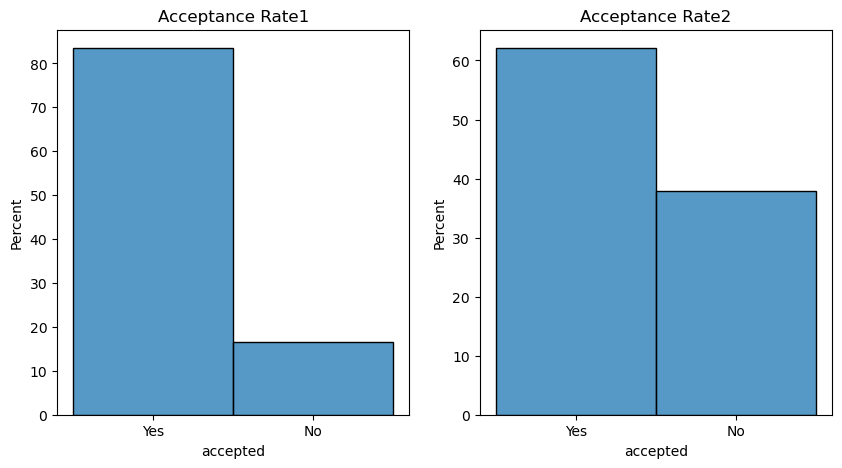

In [492]:
#bucket time of coupon 2PM lunch and 6pm Dinner and temp > 49 and destination as not urgent  vs other times
times = ['2PM','6PM']
fig,axs = plt.subplots(1,2,sharey=False,figsize=(10,5),sharex=True)
p1 = sns.histplot(R20.query('time in @times and temperature > 49 and destination=="No Urgent Place"'),x='accepted',multiple="stack",ax=axs[0],stat="percent")
p1.set_title('Acceptance Rate1')
p2 = sns.histplot(R20.query('not(time in @times and temperature > 49 and destination=="No Urgent Place")'),x='accepted',multiple="stack",ax=axs[1],stat="percent")
p2.set_title('Acceptance Rate2')
#84% customers accept this coupon during lunch and dinner time

Based on the above analysis the Restaurant(<20) coupon can be targeted to customers with features as below
- time of coupon 2PM lunch and 6pm Dinner 
- temerature is above 49 
- destination as not urgent
- Occupation in Student or Unemployed

This will improve Acceptance rate to 80 % from current 70%